## Entendimiento y procesamiento de los datos.

### Estudio del conjunto de datos NHANES mediante el empleo de técnicas de aprendizaje no supervisado. 
### Máster Universitario en Ciencia de datos
Diciembre/2019



In [160]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Carga de archivo csv preparado en SAS

In [161]:
# Carga de datos archivo csv

nhanes_df = pd.read_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Raw/nhanes.csv', sep=',')
nhanes_df.shape

(29902, 25)

In [162]:
#Inspección nhanes_df creado
nhanes_df.head(5)

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
0,62161,23.3,81.0,82.0,2.0,92.0,18.65,1,10.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,3.0,NaN,8.0,NaN,1,22,3,3.0
1,62162,14.2,45.4,NaN,2.0,NaN,NaN,1,6.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,2,3,1,NaN
2,62163,17.3,64.6,38.0,2.0,NaN,NaN,1,6.0,2.0,3.0,1.0,2.0,NaN,2.0,2.0,2.0,3.0,NaN,NaN,NaN,1,14,6,NaN
3,62164,23.2,80.1,56.0,2.0,82.0,3.51,1,6.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,2.0,8.0,NaN,8.0,NaN,2,44,3,4.0
4,62165,27.2,86.7,64.0,2.0,88.0,15.35,2,5.0,2.0,4.0,2.0,2.0,NaN,1.0,1.0,5.0,2.0,NaN,NaN,NaN,2,14,4,NaN


In [163]:
# Comprobación de "missings" en variables

nhanes_df.isnull().sum()

SEQN            0
BMXBMI       3489
BMXWAIST     4724
BPXDI1       8829
DIQ010       1195
LBXGLU      20725
LBXIN       21007
HIQ011          0
HOD050        499
HOQ065        499
HSD010      11377
INQ020        501
MCQ010       1195
MCQ300C     12855
PAQ650       9013
PAQ665       9015
PAQ710       2167
PAQ715       2167
RHQ160      23654
SLD012      10981
SMQ040      22532
RIAGENDR        0
RIDAGEYR        0
RIDRETH3        0
DMDEDUC2    12854
dtype: int64

In [164]:
#Estadísticos datos en crudo
nhanes_df.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,29902.000000,26413.000000,25178.000000,21073.000000,28707.000000,9177.000000,8895.000000,29902.000000,29403.000000,29403.000000,18525.000000,29401.000000,28707.000000,17047.000000,20889.000000,20887.000000,27735.000000,27735.000000,6248.000000,18921.000000,7370.000000,29902.000000,29902.000000,29902.000000,17048.000000
mean,78216.424085,25.680135,87.176285,66.271248,1.939527,107.094693,14.056866,1.165976,7.393871,1.491242,2.762807,1.243495,1.852580,1.726521,1.706640,1.575813,2.624950,3.381215,3.452145,7.269330,2.163094,1.506689,31.596014,3.313190,3.475246
std,9267.390684,7.885811,22.588562,14.790208,0.343598,34.653222,18.485203,0.471709,35.527464,0.600447,0.974014,0.723978,0.423732,1.130597,0.468476,0.511652,3.777501,3.672916,2.551022,2.969222,0.940484,0.499964,24.589304,1.634549,1.278619
min,62161.000000,11.500000,38.700000,0.000000,1.000000,21.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,69636.250000,19.700000,71.100000,58.000000,2.000000,92.000000,6.360000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1.000000,9.000000,2.000000,3.000000
50%,78751.500000,24.800000,87.900000,68.000000,2.000000,99.000000,9.920000,1.000000,5.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,7.000000,3.000000,2.000000,27.000000,3.000000,4.000000
75%,86226.750000,30.200000,102.700000,76.000000,2.000000,108.000000,16.010000,1.000000,7.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,8.000000,4.000000,8.000000,3.000000,2.000000,52.000000,4.000000,5.000000
max,93702.000000,82.900000,177.900000,122.000000,9.000000,479.000000,682.480000,9.000000,999.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,7.000000,2.000000,80.000000,7.000000,9.000000


In [165]:
# Contar observaciones por nº de missings 
count_na_obs = pd.DataFrame()
count_na_obs['count'] = nhanes_df.isnull().sum(axis=1).value_counts()
count_na_obs

,count
3,4541
11,3860
4,3602
1,3410
2,3384
10,2358
5,1600
7,1524
6,1261
17,1177


# Análisis imputación Variables 

Text(0.5, 0, 'Horas')

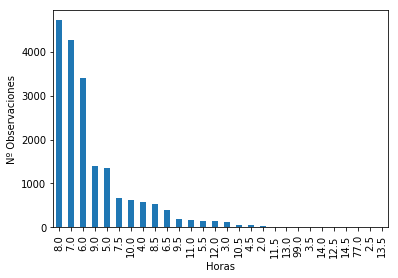

In [166]:
#Pre imputación
nhanes_df['SLD012'].value_counts().plot.bar()
plt.ylabel('Nº Observaciones')
plt.xlabel('Horas')

## Variable DIQ010

In [167]:
# Eliminación observaciones con indicador diabetes ausente/9/7

nhanes_df = nhanes_df[nhanes_df.DIQ010.notnull()]
nhanes_df = nhanes_df.query('DIQ010 == [1,2,3]')
nhanes_df['DIQ010'].value_counts()

2.0    25933
1.0     2301
3.0      457
Name: DIQ010, dtype: int64

## Variable RHQ160 - Nº de embarazos

In [168]:
# Eliminación observaciones con indicador diabetes ausente/99/77
nhanes_df['RHQ160'].value_counts()
nhanes_df = nhanes_df.query('RHQ160 != [77,99]')

In [169]:
#Imputación variable RHQ160 - n embarazaos en observaciones de género hombre

nhanes_df.loc[nhanes_df.RIAGENDR == 1, 'RHQ160'] = 0
nhanes_df['RHQ160'].value_counts()

0.0     14162
2.0      1496
3.0      1444
4.0      1037
1.0       837
5.0       641
6.0       319
7.0       191
8.0       109
9.0        67
10.0       47
11.0       37
12.0        6
13.0        5
18.0        1
16.0        1
15.0        1
33.0        1
14.0        1
25.0        1
Name: RHQ160, dtype: int64

Comprobamos el nº de observaciones con 0 missing values, observamos a continuación que el número ha crecido hasta las 2512 observaciones tras la imputación.

In [170]:
# Contar observaciones por nº de missings 
count_na_obs = pd.DataFrame()
count_na_obs['count'] = nhanes_df.isnull().sum(axis=1).value_counts()
count_na_obs


,count
3,4780
2,3849
1,3423
10,3149
0,2512
4,2062
11,2059
6,1505
5,1375
9,1207


## Variable SLD012 - N horas de sueño

Se eliminan a continuación valores 77 y 79 que representan la negación de respuesta o no sabe. 

In [171]:
nhanes_df = nhanes_df.query('SLD012 != [77,99]')
nhanes_df['SLD012'].value_counts()

8.0     4710
7.0     4263
6.0     3390
9.0     1392
5.0     1355
7.5      679
10.0     626
4.0      573
8.5      526
6.5      393
9.5      197
11.0     176
5.5      144
12.0     136
3.0      129
10.5      56
4.5       52
2.0       35
11.5      20
13.0      14
3.5       13
14.0       6
12.5       5
14.5       2
2.5        1
13.5       1
Name: SLD012, dtype: int64

/Users/raul/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/raul/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Horas')

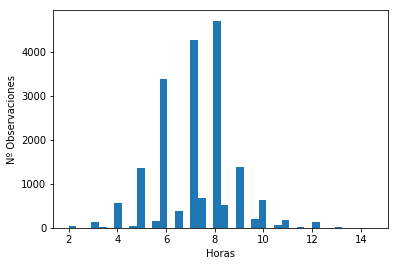

In [172]:
plt.hist(nhanes_df['SLD012'], bins=40)
plt.ylabel('Nº Observaciones')
plt.xlabel('Horas')


In [173]:
# Media horas de sueño para imputación de variable
nhanes_df['SLD012'].mean()


7.1977082671747645

In [174]:
# Imputación por la media

from sklearn.impute import SimpleImputer 

imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(nhanes_df[['SLD012']])
nhanes_df['SLD012']=imputer.transform(nhanes_df[['SLD012']])


Text(0.5, 0, 'Horas')

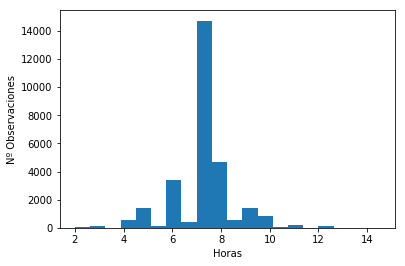

In [175]:
#Histograma tras imputación
plt.hist(nhanes_df['SLD012'], bins=20)
plt.ylabel('Nº Observaciones')
plt.xlabel('Horas')

In [176]:
# Comprobación
nhanes_df['SLD012'].value_counts()

7.197708     9782
8.000000     4710
7.000000     4263
6.000000     3390
9.000000     1392
5.000000     1355
7.500000      679
10.000000     626
4.000000      573
8.500000      526
6.500000      393
9.500000      197
11.000000     176
5.500000      144
12.000000     136
3.000000      129
10.500000      56
4.500000       52
2.000000       35
11.500000      20
13.000000      14
3.500000       13
14.000000       6
12.500000       5
14.500000       2
2.500000        1
13.500000       1
Name: SLD012, dtype: int64

In [177]:
nhanes_df.isnull().sum(axis=1).value_counts()

3     5148
2     3846
1     3420
9     3148
0     2519
4     2095
10    2087
5     1526
6     1472
8     1429
13     465
14     440
11     416
7      408
12     234
15      12
16       6
17       5
dtype: int64

## Variable INQ020 - Income 
Se eliminan a continuación valores 7 y 9 que representan la negación de respuesta o no sabe. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ed0e6a0>]],
      dtype=object)

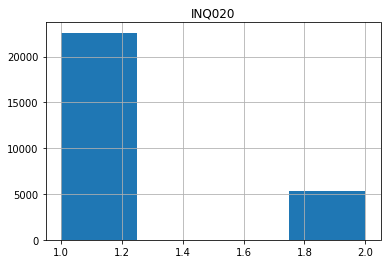

In [178]:
nhanes_df = nhanes_df.query('INQ020 != [7,9]')
nhanes_df['INQ020'].value_counts()
nhanes_df.hist(column='INQ020', bins = 4)

In [179]:
#Comprobación
nhanes_df['INQ020'].value_counts()


1.0    22608
2.0     5336
Name: INQ020, dtype: int64

In [181]:
# Imputación
imputer_INQ020=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer_INQ020=imputer_INQ020.fit(nhanes_df[['INQ020']])
nhanes_df['INQ020']=imputer_INQ020.transform(nhanes_df[['INQ020']])

In [182]:
nhanes_df['INQ020'].value_counts()

1.0    23091
2.0     5336
Name: INQ020, dtype: int64

In [183]:
#Comprobación missing 
nhanes_df.isnull().sum(axis=1).value_counts()

3     5115
2     3859
1     3385
9     3128
0     2500
4     2079
10    2062
5     1545
8     1422
6     1417
13     444
14     431
11     419
7      386
12     224
15       6
16       5
dtype: int64

## Variable HOD050 y HOQ065
Se eliminan a continuación valores 777 y 999 que representan la negación de respuesta o no sabe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1edf9ac8>]],
      dtype=object)

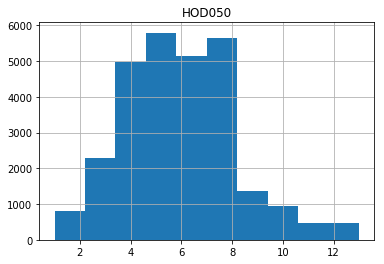

In [185]:
# Eliminación de observaciones e histograma de comprobación
nhanes_df = nhanes_df.query('HOD050 != [777,999]')
nhanes_df.hist(column='HOD050', bins = 10)

In [186]:
nhanes_df['HOD050'].mean()

5.8246336832300365

In [187]:
# Imputación media
imputer_HOD050=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer_HOD050=imputer_HOD050.fit(nhanes_df[['HOD050']])
nhanes_df['HOD050']=imputer_HOD050.transform(nhanes_df[['HOD050']])

## Variable  HOQ065

In [189]:
nhanes_df['HOQ065'].value_counts()

1.0    15255
2.0    12023
3.0      616
7.0       10
9.0        9
Name: HOQ065, dtype: int64

In [190]:
nhanes_df = nhanes_df.query('HOQ065 != [7,9]')

In [191]:
nhanes_df['HOQ065'].value_counts()


1.0    15255
2.0    12023
3.0      616
Name: HOQ065, dtype: int64

In [192]:
# Imputación media
imputer_HOQ065=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer_HOQ065=imputer_HOQ065.fit(nhanes_df[['HOQ065']])
nhanes_df['HOQ065']=imputer_HOQ065.transform(nhanes_df[['HOQ065']])

In [193]:
nhanes_df['HOQ065'].value_counts()

1.0    15736
2.0    12023
3.0      616
Name: HOQ065, dtype: int64

In [195]:
#Dataframe sin valores missing.
nhanes_n_na = nhanes_df.dropna()
nhanes_n_na

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
11,62172,33.3,120.4,70.0,2.0,104.0,18.62,1,4.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,5.0,5.0,3.0,8.0,1.0,2,43,4,3.0
38,62199,28.0,107.8,70.0,2.0,100.0,10.02,1,4.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,8.0,3.0,1,57,3,5.0
57,62218,45.4,120.3,94.0,2.0,102.0,31.35,2,8.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,3.0,0.0,2.0,5.0,1.0,2,38,4,4.0
87,62248,26.6,104.2,70.0,2.0,106.0,19.85,2,6.0,1.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,8.0,0.0,6.0,3.0,1,65,6,1.0
103,62264,31.1,112.0,60.0,2.0,130.0,21.17,1,7.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,8.0,0.0,6.0,3.0,1,77,3,2.0
104,62265,31.4,110.0,74.0,2.0,258.0,16.45,2,10.0,1.0,4.0,1.0,2.0,1.0,2.0,2.0,3.0,0.0,0.0,8.0,1.0,1,52,3,4.0
105,62266,16.6,74.6,64.0,2.0,92.0,4.89,1,5.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,0.0,6.0,3.0,1,64,3,5.0
117,62278,28.3,91.9,58.0,2.0,97.0,10.52,1,6.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,8.0,2.0,6.0,3.0,2,72,3,4.0
156,62317,27.6,107.0,76.0,1.0,98.0,5.30,1,9.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,8.0,3.0,1,46,3,5.0
192,62353,27.8,105.4,32.0,1.0,222.0,14.49,1,8.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,0.0,7.0,3.0,1,80,3,5.0


## Eliminanción de observaciones con valores no respuesta o no sabe.

Para el resto de variables del conjunto.

In [196]:
# Variable LBXGLU - Eliminación análisis con valor 0 - No presentes
#(nhanes_n_na['LBXGLU'] == 0).value_counts()
nhanes_n_na = nhanes_n_na.query('LBXGLU != 0')

# Variable HIQ011 -  Valores 7, 9
nhanes_n_na = nhanes_n_na.query('HIQ011 != [7,9]')

# Variable HSD010 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('HSD010 != [7,9]')

# Variable MCQ010 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('MCQ010 != [7,9]')

# Variable MCQ300C - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('MCQ300C != [7,9]')

# Variable PAQ650 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('PAQ650 != [7,9]')

# Variable PAQ665 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('PAQ665 != [7,9]')

# Variable PAQ710 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('PAQ710 != [77,99]')

# Variable PAQ715 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('PAQ715 != [77,99]')

# Variable SMQ040 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('SMQ040 != [7,9]')

# Variable DMDEDUC2 - Valores 7, 9
nhanes_n_na = nhanes_n_na.query('DMDEDUC2 != [7,9]')


In [197]:
nhanes_n_na.shape

(2481, 25)

In [198]:
# Exportar csv 
nhanes_n_na.to_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Raw/nhanes_n_na.csv', sep=',', encoding='utf-8')

# Análisis detección de outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ee77240>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ee70518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ee77048>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ee77780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ee77ac8>],
 'means': []}

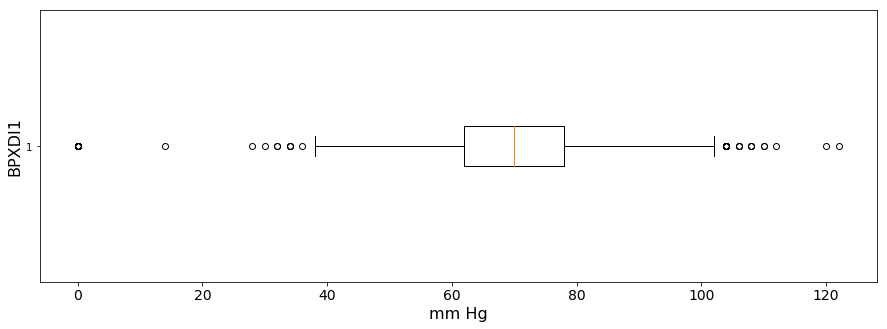

In [199]:
#Detección de outliers

plt.figure(figsize=(15,5))
plt.xlabel('mm Hg', fontsize=16)
plt.ylabel('BPXDI1', fontsize=16)
plt.xticks(fontsize=14)
plt.boxplot(nhanes_n_na['BPXDI1'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ee4fa90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ee5c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ee4f940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1ee5c7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ee5cb38>],
 'means': []}

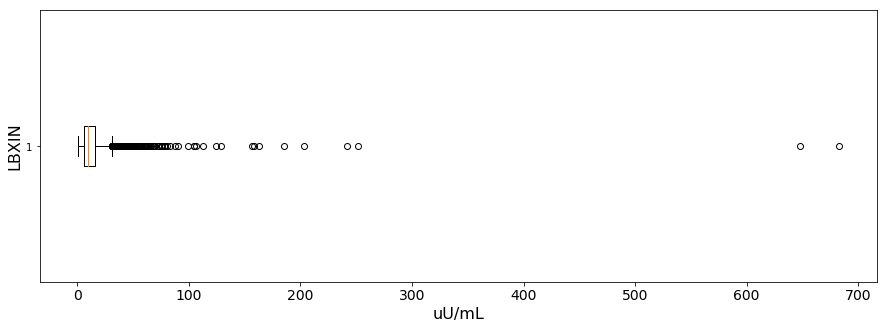

In [200]:
plt.figure(figsize=(15,5))
plt.xlabel('uU/mL', fontsize=16)
plt.ylabel('LBXIN', fontsize=16)
plt.xticks(fontsize=14)
plt.boxplot(nhanes_n_na['LBXIN'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a406719b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40679ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a406716a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a406845c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a40684908>],
 'means': []}

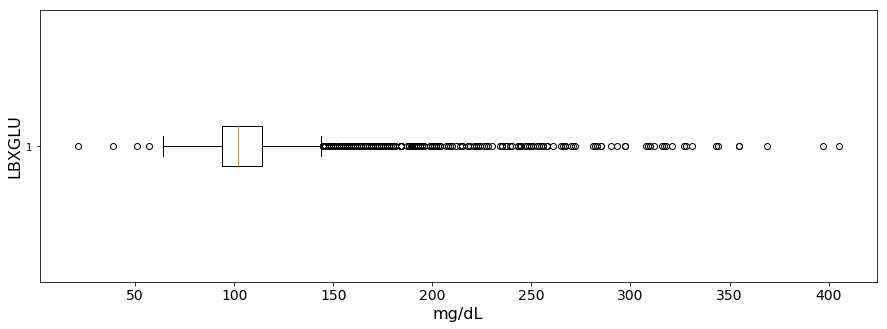

In [201]:
plt.figure(figsize=(15,5))
plt.xlabel('mg/dL', fontsize=16)
plt.ylabel('LBXGLU', fontsize=16)
plt.xticks(fontsize=14)
plt.boxplot(nhanes_n_na['LBXGLU'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a4094de10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a40958518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4094dcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a40958ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a40958ef0>],
 'means': []}

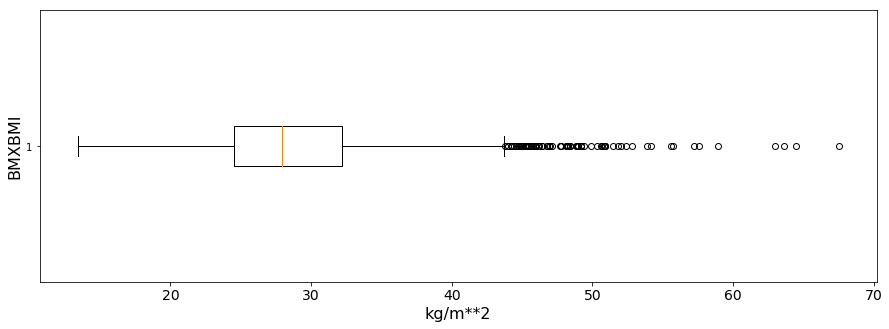

In [202]:
plt.figure(figsize=(15,5))
plt.xlabel('kg/m**2', fontsize=16)
plt.ylabel('BMXBMI', fontsize=16)
plt.xticks(fontsize=14)
plt.boxplot(nhanes_n_na['BMXBMI'], vert=False)

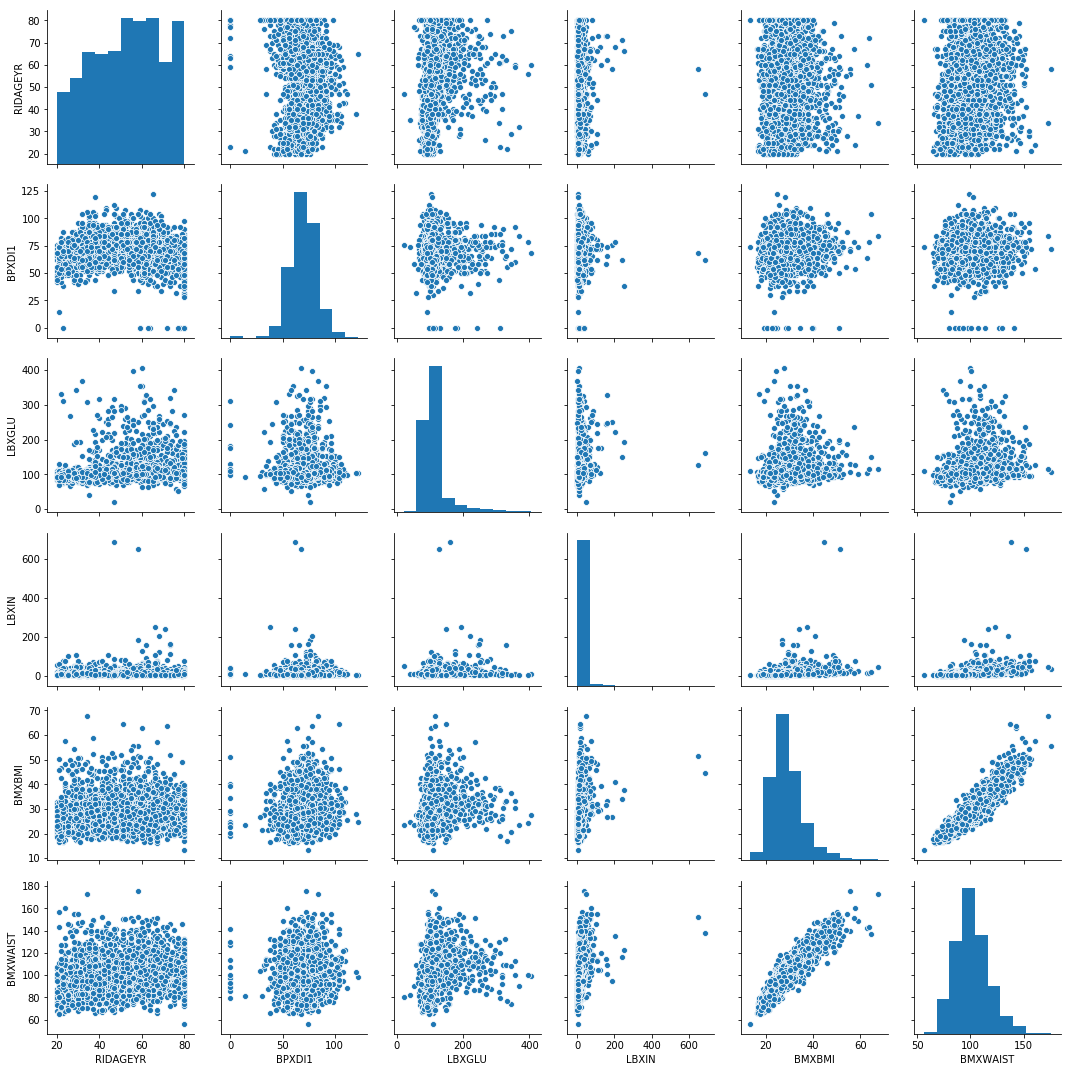

In [203]:
# Plot de pares variables continuas
sns.pairplot(nhanes_n_na[['RIDAGEYR', 'BPXDI1', 'LBXGLU', 'LBXIN', 'BMXBMI', 'BMXWAIST']])


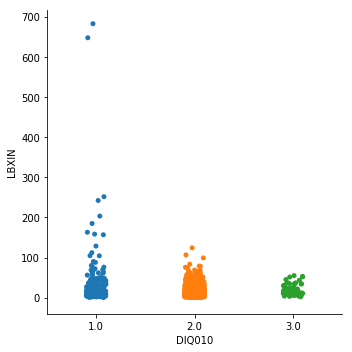

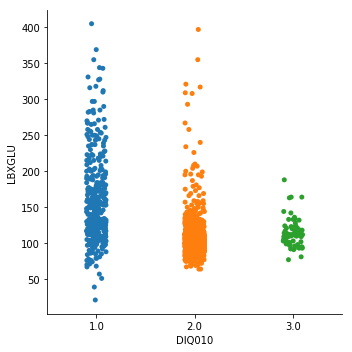

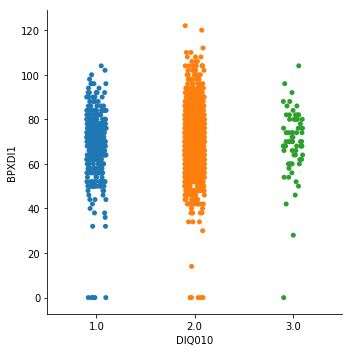

In [204]:
# Analisis outliers por categorias: Diabéticos
# Dispersión
sns.catplot(x="DIQ010", y="LBXIN", data=nhanes_n_na);

sns.catplot(x="DIQ010", y="LBXGLU", data=nhanes_n_na);

sns.catplot(x="DIQ010", y="BPXDI1", data=nhanes_n_na);

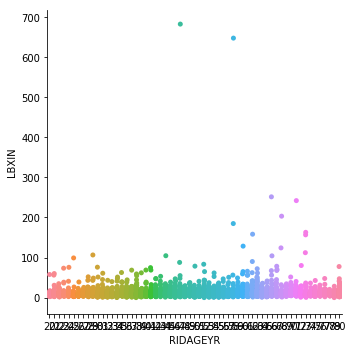

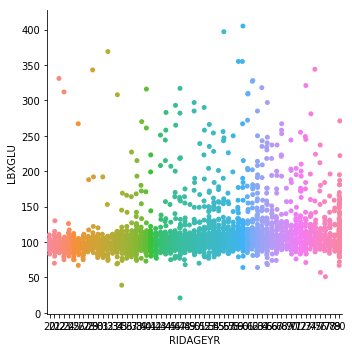

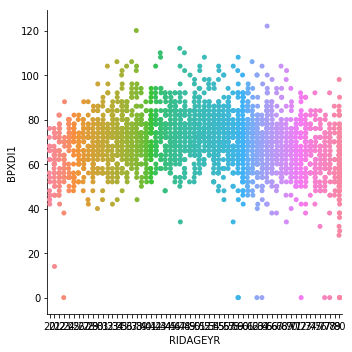

In [205]:
# Analisis outliers por categorias: Diabéticos
# Dispersión
sns.catplot(x="RIDAGEYR", y="LBXIN", data=nhanes_n_na);
sns.catplot(x="RIDAGEYR", y="LBXGLU", data=nhanes_n_na);
sns.catplot(x="RIDAGEYR", y="BPXDI1", data=nhanes_n_na);

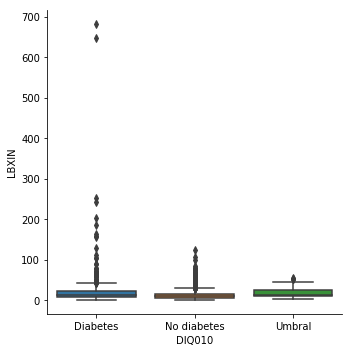

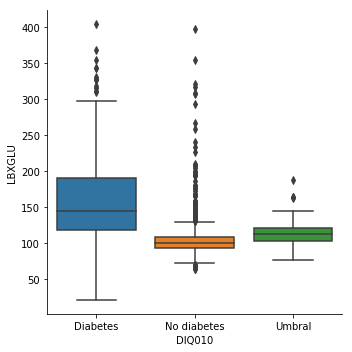

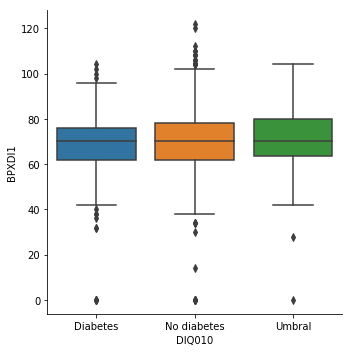

In [206]:
# Boxplot 
sns.catplot(x="DIQ010", y="LBXIN", kind="box", 
            data=nhanes_n_na).set(xticklabels=['Diabetes','No diabetes','Umbral'])
sns.catplot(x="DIQ010", y="LBXGLU", kind="box", data=nhanes_n_na).set(xticklabels=['Diabetes','No diabetes','Umbral'])
sns.catplot(x="DIQ010", y="BPXDI1", kind="box", data=nhanes_n_na).set(xticklabels=['Diabetes','No diabetes','Umbral'])


## Eliminación outliers
Observaciones fuera más alla de 3 desviaciones para las variables continuas.
Cálculo de indices, unión y eleiminación

In [207]:
z4 = np.abs(stats.zscore(nhanes_n_na['LBXIN']))
print(np.where(z4 > 3))

(array([  34,  255,  461,  464,  594,  845, 1045, 1247, 1270, 1458, 1471,
       1491, 1705, 1803, 2016, 2065, 2298, 2394]),)


In [208]:
len((np.where(z4 > 3)[0]))

18

In [209]:
# Observaciones más allá de 3 desviaciones BMXBMI
z1 = np.abs(stats.zscore(nhanes_n_na['BMXBMI']))
print(np.where(z1 > 3))

(array([  99,  112,  255,  261,  417,  588,  594,  699,  804,  830,  874,
        934,  956, 1017, 1074, 1140, 1205, 1290, 1384, 1397, 1499, 1502,
       1505, 1672, 1793, 1822, 1903, 2055, 2115, 2118, 2129, 2204, 2206,
       2351, 2417]),)


In [210]:
len((np.where(z1 > 3)[0]))

35

In [211]:
z2 = np.abs(stats.zscore(nhanes_n_na['BPXDI1']))
print(np.where(z2 > 3))

(array([ 106,  113,  126,  140,  303,  699,  877, 1114, 1228, 1280, 1304,
       1528, 1552, 1559, 1929, 2083, 2117, 2253, 2359, 2371]),)


In [212]:
len((np.where(z2 > 3)[0]))

20

In [213]:
z3 = np.abs(stats.zscore(nhanes_n_na['LBXGLU']))
print(np.where(z3 > 3))

(array([   5,   52,   60,  113,  115,  140,  143,  166,  167,  182,  198,
        199,  209,  288,  319,  464,  587,  603,  619,  669,  681,  689,
        715,  845,  937,  941,  942,  976,  983, 1057, 1059, 1131, 1238,
       1245, 1350, 1422, 1491, 1579, 1606, 1634, 1649, 1716, 1733, 1753,
       1811, 1816, 1846, 1850, 1856, 1874, 1880, 1936, 2016, 2089, 2118,
       2131, 2136, 2176, 2184, 2221, 2270, 2298, 2319, 2368, 2380, 2390,
       2394, 2434, 2439, 2469]),)


In [214]:
len((np.where(z3 > 3)[0]))

70

In [215]:
# Unión índices para drop outliers
union_1 = np.union1d(np.where(z1 > 3), np.where(z4 > 3))
union_2 = np.union1d(np.where(z2 > 3), np.where(z3 > 3))
np.union1d(union_1, union_2)

array([   5,   34,   52,   60,   99,  106,  112,  113,  115,  126,  140,
        143,  166,  167,  182,  198,  199,  209,  255,  261,  288,  303,
        319,  417,  461,  464,  587,  588,  594,  603,  619,  669,  681,
        689,  699,  715,  804,  830,  845,  874,  877,  934,  937,  941,
        942,  956,  976,  983, 1017, 1045, 1057, 1059, 1074, 1114, 1131,
       1140, 1205, 1228, 1238, 1245, 1247, 1270, 1280, 1290, 1304, 1350,
       1384, 1397, 1422, 1458, 1471, 1491, 1499, 1502, 1505, 1528, 1552,
       1559, 1579, 1606, 1634, 1649, 1672, 1705, 1716, 1733, 1753, 1793,
       1803, 1811, 1816, 1822, 1846, 1850, 1856, 1874, 1880, 1903, 1929,
       1936, 2016, 2055, 2065, 2083, 2089, 2115, 2117, 2118, 2129, 2131,
       2136, 2176, 2184, 2204, 2206, 2221, 2253, 2270, 2298, 2319, 2351,
       2359, 2368, 2371, 2380, 2390, 2394, 2417, 2434, 2439, 2469])

In [216]:
# eliminación outliers - Creación DF nhanes_no_o
nhanes_no_o = nhanes_n_na.drop(nhanes_n_na.index[np.union1d(union_1, union_2)])

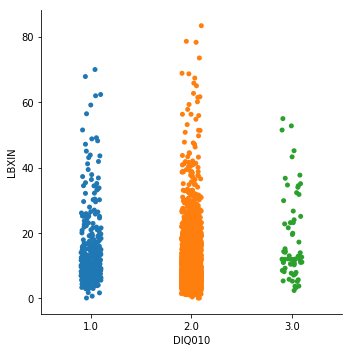

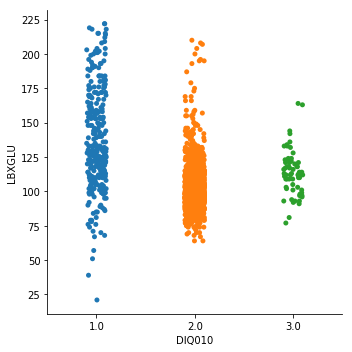

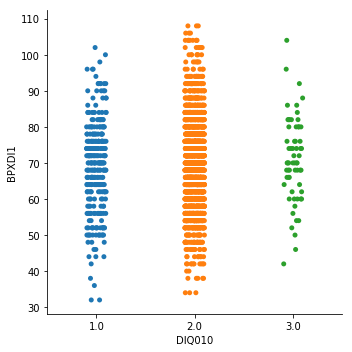

In [217]:
sns.catplot(x="DIQ010", y="LBXIN", data=nhanes_no_o);
sns.catplot(x="DIQ010", y="LBXGLU", data=nhanes_no_o);
sns.catplot(x="DIQ010", y="BPXDI1", data=nhanes_no_o);

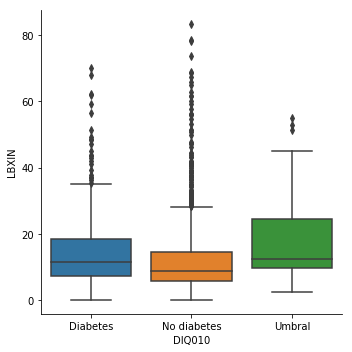

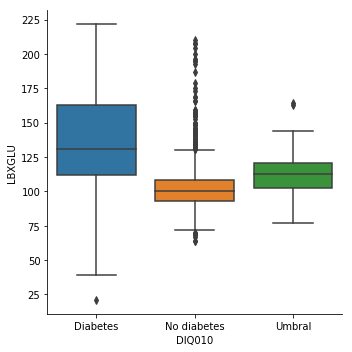

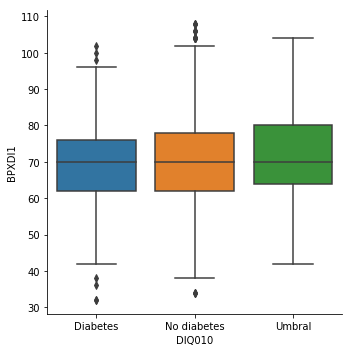

In [218]:
# Boxplot 
sns.catplot(x="DIQ010", y="LBXIN", kind="box", 
            data=nhanes_no_o).set(xticklabels=['Diabetes','No diabetes','Umbral'])
sns.catplot(x="DIQ010", y="LBXGLU", kind="box", 
            data=nhanes_no_o).set(xticklabels=['Diabetes','No diabetes','Umbral'])
sns.catplot(x="DIQ010", y="BPXDI1", kind="box", 
            data=nhanes_no_o).set(xticklabels=['Diabetes','No diabetes','Umbral'])

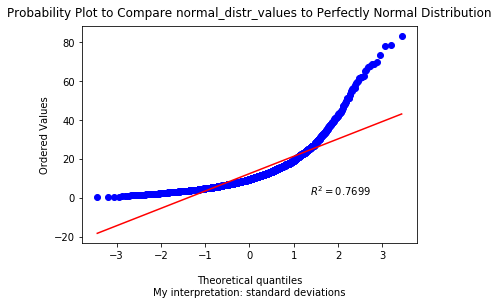

In [219]:
# Test Normalidad
stats.probplot(nhanes_no_o['LBXIN'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.title("Probability Plot to Compare normal_distr_values to Perfectly Normal Distribution", y=1.015)
plt.show()

In [220]:
# Exportar csv datos Sin missing y Sin outliers
nhanes_no_o.to_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanes_no_o.csv', sep=',',
                   encoding='utf-8')  #, index_col = False

## Comprensión de los datos

In [221]:
nhanes_no_o.shape

(2350, 25)

In [222]:
nhanes_no_o.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,28.621532,100.306298,69.783830,1.899574,106.891064,12.360209,1.226809,5.672155,1.432340,2.939149,1.287234,1.830638,1.571064,1.813191,1.595319,2.858298,3.577021,1.230213,7.081311,2.189362,1.352766,52.280851,3.228511,3.306809
std,9126.590848,5.907824,15.115378,11.739658,0.379498,22.531092,10.167614,0.418857,1.986906,0.535954,0.940616,0.452568,0.375151,0.495030,0.389841,0.490935,1.784209,3.292958,2.044883,1.563816,0.936633,0.477932,16.698700,1.365245,1.192032
min,62172.000000,13.400000,56.200000,32.000000,1.000000,21.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69906.250000,24.400000,90.000000,62.000000,2.000000,94.000000,6.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,6.000000,1.000000,1.000000,38.000000,3.000000,2.000000
50%,78989.000000,27.800000,99.400000,70.000000,2.000000,102.000000,9.385000,1.000000,5.824634,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,86122.500000,31.900000,109.200000,78.000000,2.000000,112.000000,15.302500,1.000000,7.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,8.000000,2.000000,8.000000,3.000000,2.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,3.000000,222.000000,83.340000,2.000000,13.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


## Resumen estadístico

In [223]:
# Distribución de los dtos por sexo

nhanes_no_o['RIAGENDR'].value_counts()

1    1521
2     829
Name: RIAGENDR, dtype: int64

In [224]:
#Asma MCQ010
nhanes_no_o['MCQ010'].value_counts()

2.0    1952
1.0     398
Name: MCQ010, dtype: int64

In [225]:
# Seguro de salud HIQ011
nhanes_no_o['HIQ011'].value_counts()

1    1817
2     533
Name: HIQ011, dtype: int64

In [226]:
# Parientes con diabetes
nhanes_no_o['MCQ300C'].value_counts()

2.0    1342
1.0    1008
Name: MCQ300C, dtype: int64

In [227]:
# Actividad deportiva 
nhanes_no_o['PAQ650'].value_counts()

2.0    1911
1.0     439
Name: PAQ650, dtype: int64

In [228]:
# Actividad moderada
nhanes_no_o['PAQ665'].value_counts()

2.0    1399
1.0     951
Name: PAQ665, dtype: int64

In [229]:
# Nivel de educación
nhanes_no_o['DMDEDUC2'].value_counts()

4.0    721
3.0    612
2.0    410
5.0    406
1.0    201
Name: DMDEDUC2, dtype: int64

In [230]:
# Distribución de los dtos diabetes
nhanes_no_o['HOQ065'].value_counts()

1.0    1383
2.0     918
3.0      49
Name: HOQ065, dtype: int64

In [231]:
# Fumadores
nhanes_no_o['SMQ040'].value_counts()

3.0    1295
1.0     850
2.0     205
Name: SMQ040, dtype: int64

<BarContainer object of 3 artists>

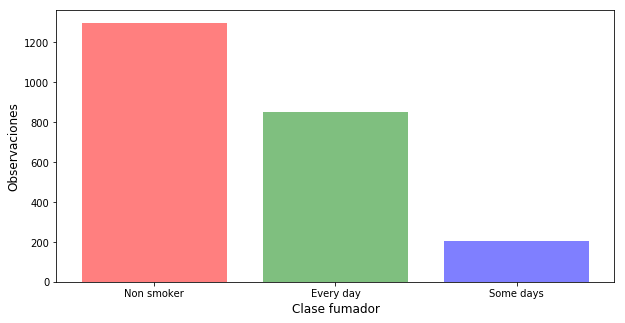

In [232]:
my_colors = 'rgbkymc'
plt.figure(figsize=(10,5))
plt.xlabel('Clase fumador', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['Non smoker', 'Every day', 'Some days'], nhanes_no_o['SMQ040'].value_counts(), align='center', alpha=0.5, color=my_colors)

In [233]:
# Estado general de salud
nhanes_no_o['HSD010'].value_counts()

3.0    992
2.0    562
4.0    553
1.0    155
5.0     88
Name: HSD010, dtype: int64

In [234]:
# Embarazos mujeres
nhanes_no_o.loc[nhanes_no_o['RIAGENDR'] == 2]['RHQ160'].value_counts()

3.0     189
2.0     183
4.0     137
1.0     111
5.0     101
6.0      50
7.0      19
9.0      14
8.0      11
10.0      8
11.0      5
12.0      1
Name: RHQ160, dtype: int64

In [235]:
# Media embarazos mujer
nhanes_no_o.loc[nhanes_no_o['RIAGENDR'] == 2]['RHQ160'].mean()


3.4873341375150786

In [236]:
# Horas televisión
nhanes_no_o['PAQ710'].mean()


2.8582978723404255

In [237]:
#Horas ordenador
nhanes_no_o['PAQ715'].mean()

3.5770212765957448

In [238]:
# Raza
nhanes_no_o['RIDRETH3'].value_counts()

3    1124
4     474
2     254
1     251
6     169
7      78
Name: RIDRETH3, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43a9de10>]],
      dtype=object)

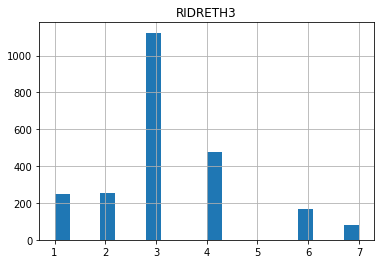

In [239]:
nhanes_no_o.hist(column='RIDRETH3', bins = 20)

([<matplotlib.patches.Wedge at 0x1a43c53128>,
 [Text(0.07493912439338499, 1.097444361977022, 'Non-Hispanic White'),
  Text(-0.966757325118559, -0.5247668761741818, 'Non-Hispanic Black'),
  Text(-0.1101053245591017, -1.0944755901817707, 'Other Hispanic'),
  Text(0.5980747685721466, -0.9232045121192669, 'Mexican American'),
  Text(0.9977999857378061, -0.4630282804123674, 'Non-Hispanic Asian'),
  Text(1.0940252105552346, -0.11449383681916955, 'Other Race - Including Multi-Racial')])

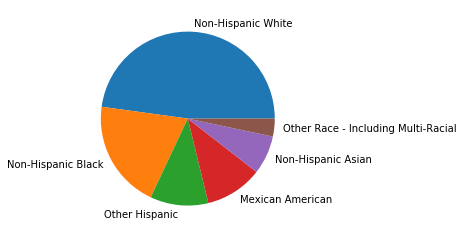

In [240]:
labels = ['Non-Hispanic White', 'Non-Hispanic Black', 'Other Hispanic', 'Mexican American', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial']
plt.pie(nhanes_no_o['RIDRETH3'].value_counts(), labels = labels)

Text(0.5, 0, 'Edad (Años)')

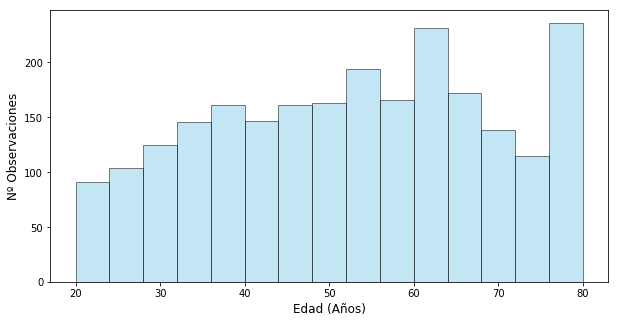

In [241]:
# Edad 
plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['RIDAGEYR'], bins=15, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('Edad (Años)', fontsize=12)

In [242]:
# N Observaciones mayor 60 años
nhanes_no_o.loc[nhanes_n_na['RIDAGEYR'] >= 60].shape

(892, 25)

Text(0.5, 0, 'BMI (kg/m**2)')

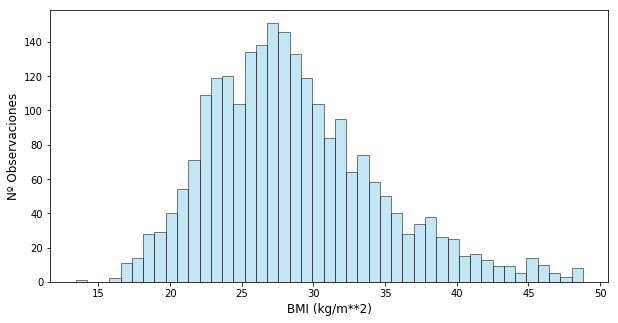

In [243]:
# BMIBMX Indice de masa corporal
plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['BMXBMI'], bins=45, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('BMI (kg/m**2)', fontsize=12)

Text(0.5, 0, 'BMI (kg/m**2)')

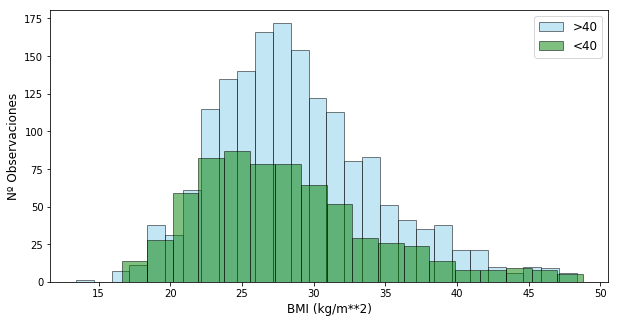

In [244]:
# BMI por grupo de edad (>40;<40)
plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o.loc[nhanes_no_o['RIDAGEYR'] > 40]['BMXBMI'], bins=28,
         alpha=0.5,label = '>40', histtype='bar', ec='black', color = "skyblue")
plt.hist(nhanes_no_o.loc[nhanes_no_o['RIDAGEYR'] <= 40]['BMXBMI'], bins=18,
         alpha=0.5,label = '<40', histtype='bar', ec='black', color = "green")
plt.legend(fontsize=12)

plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('BMI (kg/m**2)', fontsize=12)

In [245]:
# Medias por grup de edad
nhanes_no_o.loc[nhanes_no_o['RIDAGEYR'] > 40]['BMXBMI'].mean()

28.84579606440068

In [246]:
nhanes_no_o.loc[nhanes_no_o['RIDAGEYR'] <= 40]['BMXBMI'].mean()

28.06270430906389

Text(0.5, 0, 'Cintura (cm)')

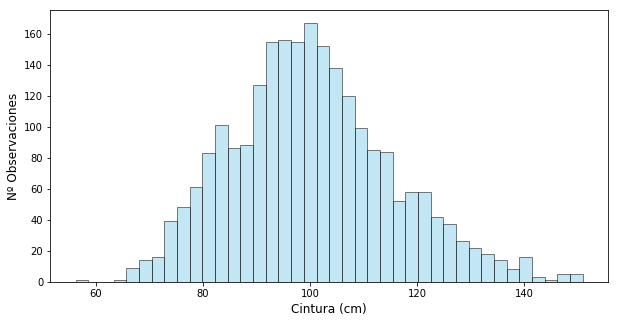

In [247]:
# Waist circumference
plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['BMXWAIST'], bins=40, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('Cintura (cm)', fontsize=12)

<BarContainer object of 2 artists>

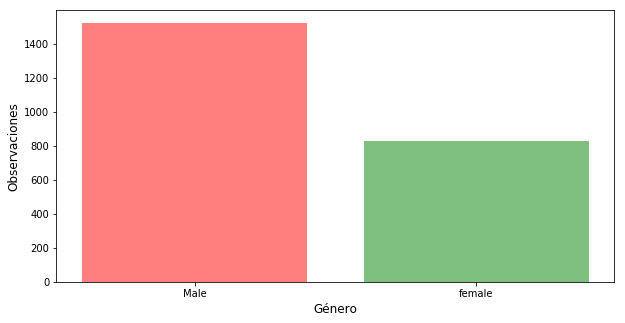

In [248]:
# Distribución por género
my_colors = 'rgbkymc'
plt.figure(figsize=(10,5))
plt.xlabel('Género', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['Male', 'female'], nhanes_no_o['RIAGENDR'].value_counts(), align='center', alpha=0.5, color=my_colors)

## Variables laboratorio y examination


Text(0.5, 0, 'Insulin (uU/mL)')

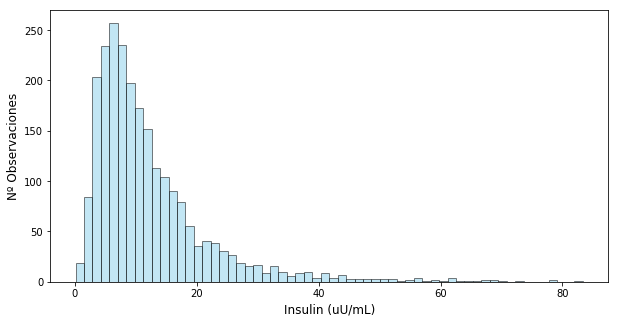

In [249]:
#Insulin LBXIN

plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['LBXIN'], bins=60, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('Insulin (uU/mL)', fontsize=12)

Text(0.5, 0, 'Fasting Glucose (mg/dL)')

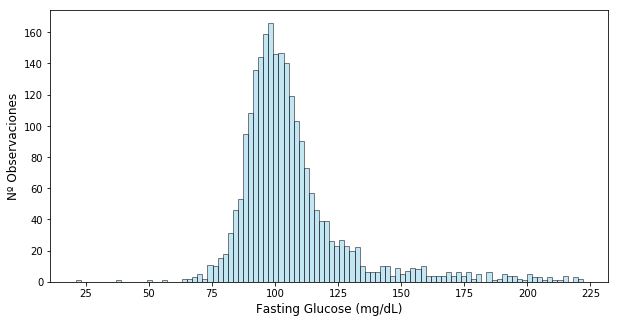

In [250]:
#Insulin LBXGLU

plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['LBXGLU'], bins= 100, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('Fasting Glucose (mg/dL)', fontsize=12)

Text(0.5, 0, 'Diastolic: Blood pres (1st rdg) mm Hg')

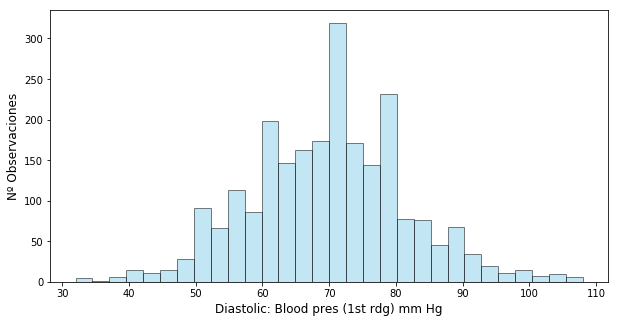

In [251]:
#Blood pressure

plt.figure(figsize=(10,5))
plt.hist(nhanes_no_o['BPXDI1'], bins= 30, alpha=0.5, histtype='bar', ec='black', color = "skyblue")
plt.ylabel('Nº Observaciones', fontsize=12)
plt.xlabel('Diastolic: Blood pres (1st rdg) mm Hg', fontsize=12)

In [252]:
# N observaciones con presión diastolica menor a 60
nhanes_no_o.loc[nhanes_n_na['BPXDI1'] <60].shape

(436, 25)

In [253]:
# Variables diabetes, parientes

<BarContainer object of 2 artists>

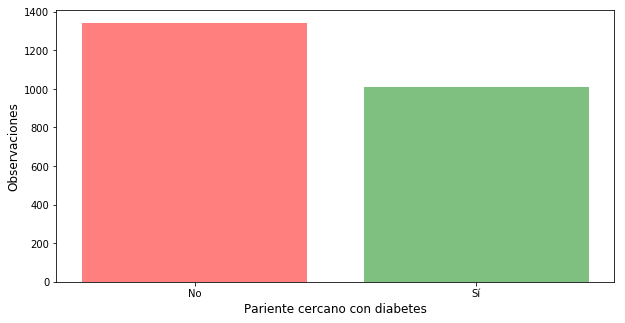

In [254]:
# Parientes con diabetes
#my_colors = 'rgbkymc'
plt.figure(figsize=(10,5))
plt.xlabel('Pariente cercano con diabetes', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['No', 'Sí'], nhanes_no_o['MCQ300C'].value_counts(), align='center', alpha=0.5, color=my_colors)

In [255]:
nhanes_no_o['MCQ300C'].value_counts()

2.0    1342
1.0    1008
Name: MCQ300C, dtype: int64

In [256]:
nhanes_no_o['PAQ710'].value_counts()

2.0    538
5.0    472
3.0    410
1.0    331
4.0    316
0.0    226
8.0     57
Name: PAQ710, dtype: int64

<BarContainer object of 7 artists>

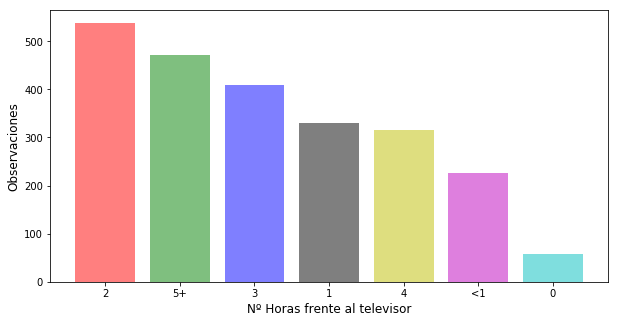

In [257]:
# Horas televisión
plt.figure(figsize=(10,5))
plt.xlabel('Nº Horas frente al televisor', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['2', '5+', '3', '1', '4', '<1', '0'], 
        nhanes_no_o['PAQ710'].value_counts(), align='center', alpha=0.5, color=my_colors)

In [258]:
nhanes_no_o['PAQ710'].value_counts()

2.0    538
5.0    472
3.0    410
1.0    331
4.0    316
0.0    226
8.0     57
Name: PAQ710, dtype: int64

In [259]:
nhanes_no_o['PAQ715'].value_counts()

8.0    749
0.0    562
1.0    393
2.0    274
3.0    149
5.0    134
4.0     89
Name: PAQ715, dtype: int64

<BarContainer object of 7 artists>

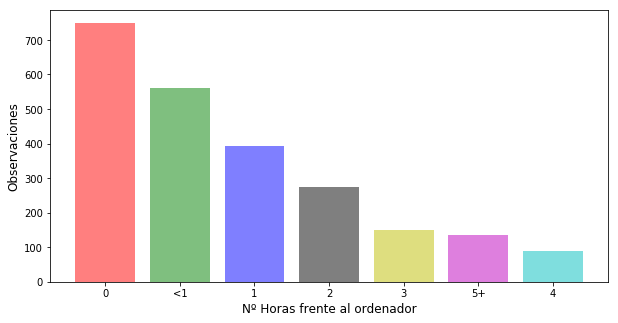

In [260]:
# Horas ordenador
plt.figure(figsize=(10,5))
plt.xlabel('Nº Horas frente al ordenador', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['0', '<1', '1', '2', '3', '5+', '4'], 
        nhanes_no_o['PAQ715'].value_counts(), align='center', alpha=0.5, color=my_colors)

<BarContainer object of 2 artists>

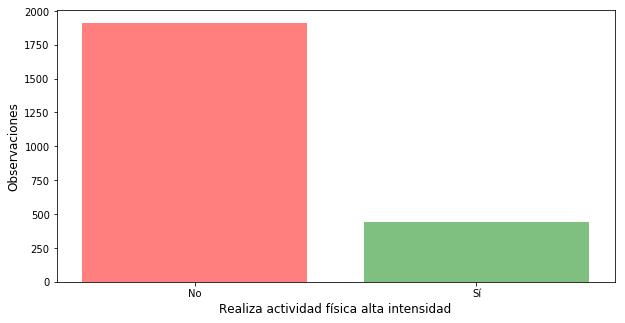

In [261]:
# Actividad física alta intensidad

plt.figure(figsize=(10,5))
plt.xlabel('Realiza actividad física alta intensidad', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['No', 'Sí'], 
        nhanes_no_o['PAQ650'].value_counts(), align='center', alpha=0.5, color=my_colors)

<BarContainer object of 2 artists>

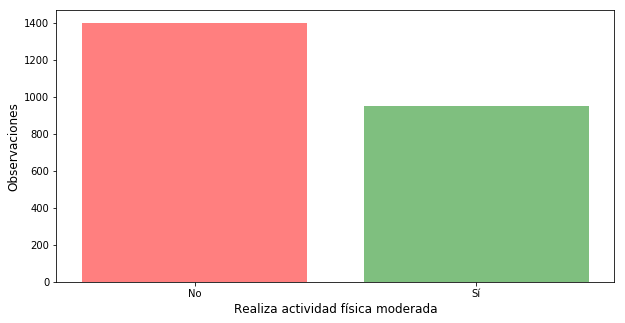

In [262]:
# Actividad física moderada

plt.figure(figsize=(10,5))
plt.xlabel('Realiza actividad física moderada', fontsize=12)
plt.ylabel('Observaciones', fontsize=12)
plt.bar(['No', 'Sí'], 
        nhanes_no_o['PAQ665'].value_counts(), align='center', alpha=0.5, color=my_colors)

<BarContainer object of 3 artists>

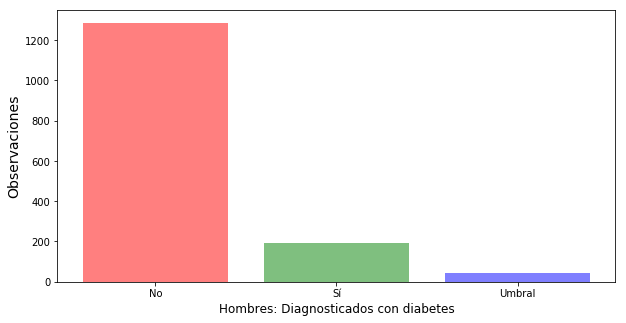

In [263]:
# Diabetes por genero masculino

plt.figure(figsize=(10,5))
plt.xlabel('Hombres: Diagnosticados con diabetes', fontsize=12)
plt.ylabel('Observaciones', fontsize=14)
plt.bar(['No', 'Sí', 'Umbral'], nhanes_no_o.loc[nhanes_n_na['RIAGENDR'] == 1]['DIQ010'].value_counts(),
        align='center', alpha=0.5, color=my_colors)




<BarContainer object of 3 artists>

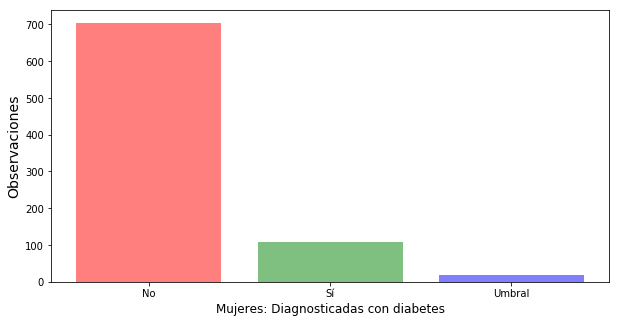

In [264]:
# Diabetes por genero femenino
plt.figure(figsize=(10,5))
plt.xlabel('Mujeres: Diagnosticadas con diabetes', fontsize=12)
plt.ylabel('Observaciones', fontsize=14)
plt.bar(['No', 'Sí', 'Umbral'], nhanes_no_o.loc[nhanes_n_na['RIAGENDR'] == 2]['DIQ010'].value_counts(),
        align='center', alpha=0.5, color=my_colors)

In [265]:
nhanes_no_o.loc[nhanes_n_na['RIAGENDR'] == 1]['DIQ010'].value_counts()

2.0    1284
1.0     192
3.0      45
Name: DIQ010, dtype: int64

In [266]:
nhanes_no_o.loc[nhanes_n_na['RIAGENDR'] == 2]['DIQ010'].value_counts()

2.0    704
1.0    107
3.0     18
Name: DIQ010, dtype: int64

<BarContainer object of 3 artists>

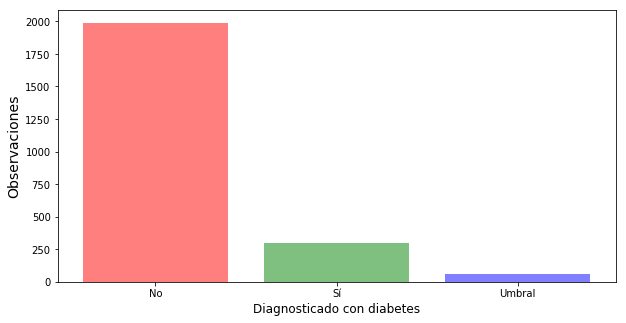

In [267]:
# Diabtes todo conjunto
plt.figure(figsize=(10,5))
plt.xlabel('Diagnosticado con diabetes', fontsize=12)
plt.ylabel('Observaciones', fontsize=14)
plt.bar(['No', 'Sí', 'Umbral'], nhanes_no_o['DIQ010'].value_counts(),
        align='center', alpha=0.5, color=my_colors)

In [268]:
nhanes_no_o['DIQ010'].value_counts()

2.0    1988
1.0     299
3.0      63
Name: DIQ010, dtype: int64

In [269]:
# No diagnosticado con diabetes - parientes
nhanes_no_o.loc[nhanes_no_o['DIQ010'] == 2]['MCQ300C'].value_counts()

2.0    1227
1.0     761
Name: MCQ300C, dtype: int64

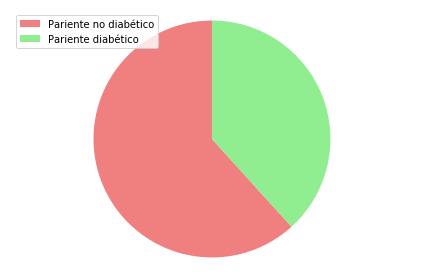

In [270]:
labels = ['Pariente no diabético', 'Pariente diabético']
colors = ['lightcoral', 'lightgreen']
plt.pie(nhanes_no_o.loc[nhanes_no_o['DIQ010'] == 2]['MCQ300C'].value_counts(),
       colors = colors, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()

In [271]:
# Sí diagnosticado con diabetes - parientes
nhanes_no_o.loc[nhanes_no_o['DIQ010'] == 1]['MCQ300C'].value_counts()

1.0    211
2.0     88
Name: MCQ300C, dtype: int64

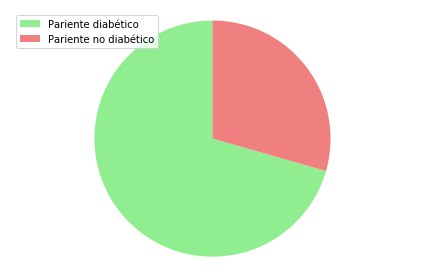

In [272]:
from matplotlib import cm
labels = ['Pariente diabético', 'Pariente no diabético']
colors = ['lightgreen', 'lightcoral']
plt.pie(nhanes_no_o.loc[nhanes_no_o['DIQ010'] == 1]['MCQ300C'].value_counts(),
         colors = colors, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()

# Calidad de los datos

variables BPXDI1, LBXIN, LBXGLU y BMI.

## N Casos outliers

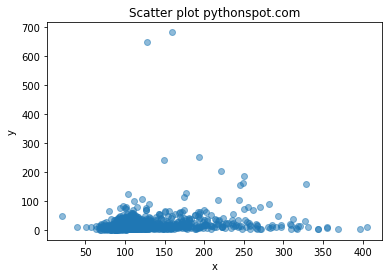

In [273]:
# Plot
plt.scatter(nhanes_n_na['LBXGLU'], nhanes_n_na['LBXIN'], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

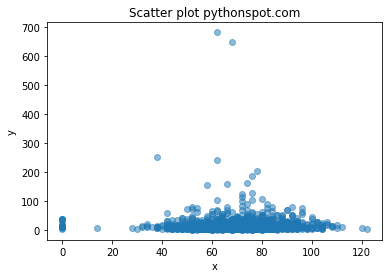

In [274]:
# Plot
plt.scatter(nhanes_n_na['BPXDI1'], nhanes_n_na['LBXIN'], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

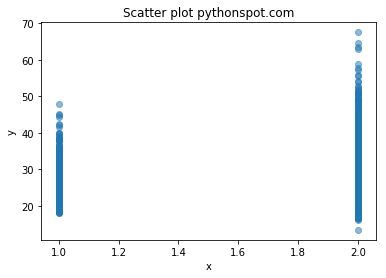

In [275]:
# Plot
plt.scatter(nhanes_n_na['PAQ650'], nhanes_n_na['BMXBMI'], alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

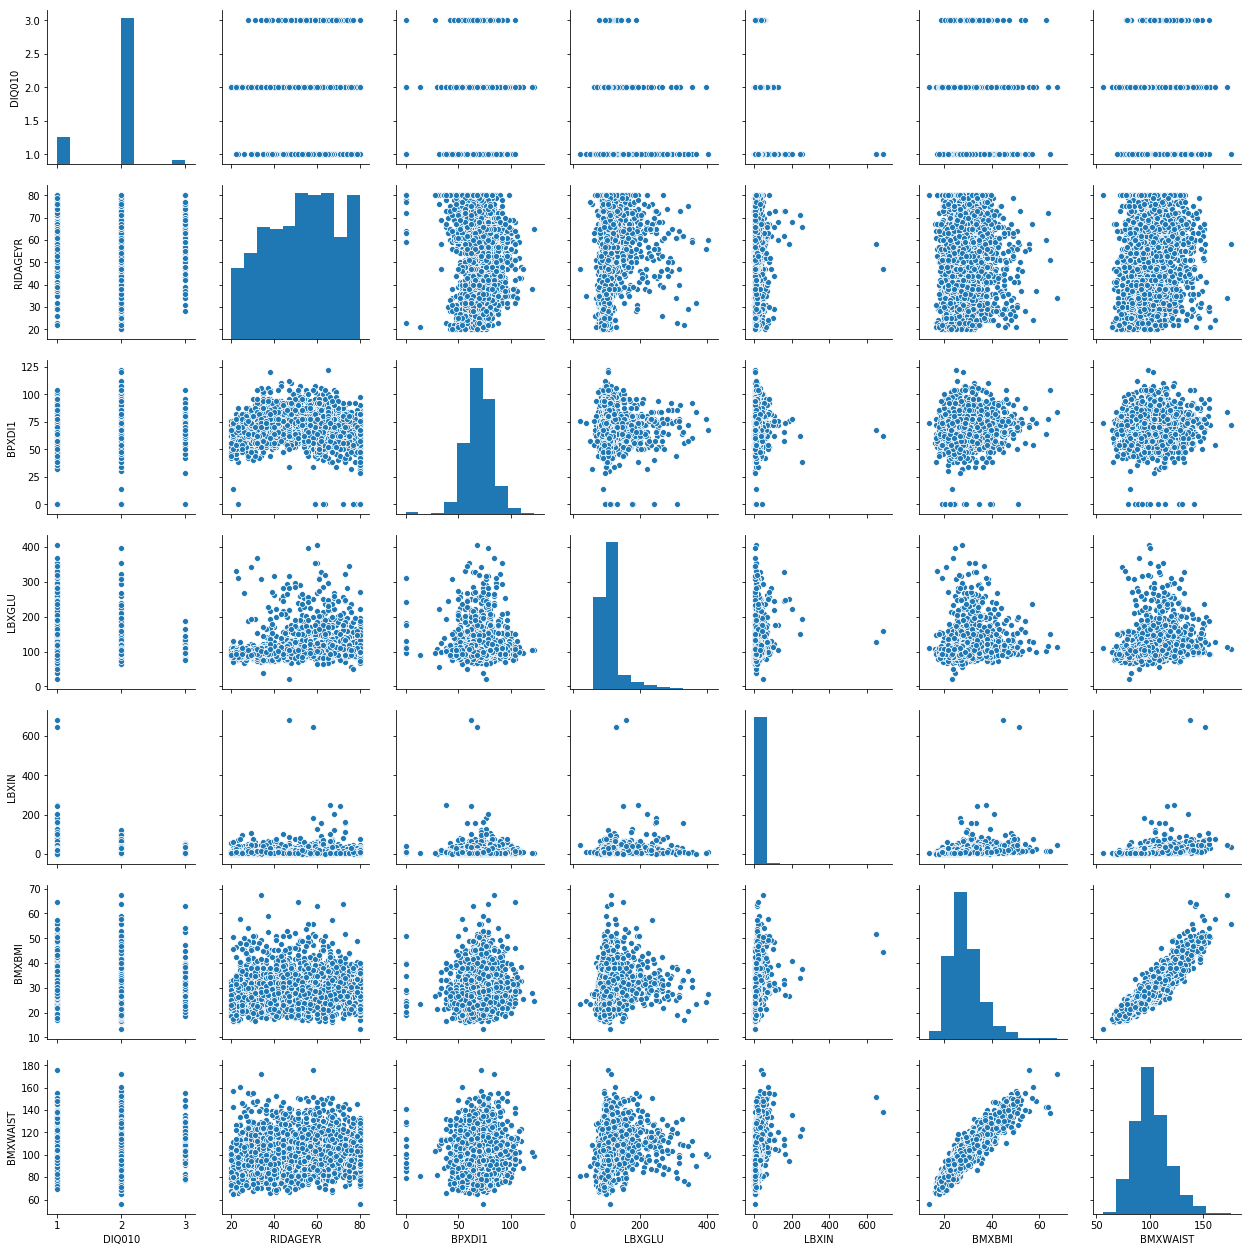

In [276]:
# Seaborn visualization library
#import seaborn as sns
# Create the default pairplot
sns.pairplot(nhanes_n_na[['DIQ010', 'RIDAGEYR', 'BPXDI1', 'LBXGLU', 'LBXIN', 'BMXBMI', 'BMXWAIST']])


# Tranformaciones 

In [277]:
#Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

# CSV Datos limpios 
nhanes_clean = pd.read_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanes_no_o.csv',
                           sep=',', index_col=[0])
nhanes_clean.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,28.621532,100.306298,69.783830,1.899574,106.891064,12.360209,1.226809,5.672155,1.432340,2.939149,1.287234,1.830638,1.571064,1.813191,1.595319,2.858298,3.577021,1.230213,7.081311,2.189362,1.352766,52.280851,3.228511,3.306809
std,9126.590848,5.907824,15.115378,11.739658,0.379498,22.531092,10.167614,0.418857,1.986906,0.535954,0.940616,0.452568,0.375151,0.495030,0.389841,0.490935,1.784209,3.292958,2.044883,1.563816,0.936633,0.477932,16.698700,1.365245,1.192032
min,62172.000000,13.400000,56.200000,32.000000,1.000000,21.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69906.250000,24.400000,90.000000,62.000000,2.000000,94.000000,6.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,6.000000,1.000000,1.000000,38.000000,3.000000,2.000000
50%,78989.000000,27.800000,99.400000,70.000000,2.000000,102.000000,9.385000,1.000000,5.824634,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,86122.500000,31.900000,109.200000,78.000000,2.000000,112.000000,15.302500,1.000000,7.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,8.000000,2.000000,8.000000,3.000000,2.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,3.000000,222.000000,83.340000,2.000000,13.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,8.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


In [278]:
# Recodificación variables PAQ710 y PAQ715 horas televisión y ordenador 
# Recodificación valores 0 -> 1 8->0 para establecer orden en base a medida de similitud  

nhanes_clean.loc[nhanes_clean.PAQ710 == 0, 'PAQ710'] = 0.5
nhanes_clean.loc[nhanes_clean.PAQ710 == 8, 'PAQ710'] = 0

nhanes_clean.loc[nhanes_clean.PAQ715 == 0, 'PAQ715'] = 0.5
nhanes_clean.loc[nhanes_clean.PAQ715 == 8, 'PAQ715'] = 0

nhanes_clean.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,28.621532,100.306298,69.783830,1.899574,106.891064,12.360209,1.226809,5.672155,1.432340,2.939149,1.287234,1.830638,1.571064,1.813191,1.595319,2.712340,1.146809,1.230213,7.081311,2.189362,1.352766,52.280851,3.228511,3.306809
std,9126.590848,5.907824,15.115378,11.739658,0.379498,22.531092,10.167614,0.418857,1.986906,0.535954,0.940616,0.452568,0.375151,0.495030,0.389841,0.490935,1.570948,1.407553,2.044883,1.563816,0.936633,0.477932,16.698700,1.365245,1.192032
min,62172.000000,13.400000,56.200000,32.000000,1.000000,21.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69906.250000,24.400000,90.000000,62.000000,2.000000,94.000000,6.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,38.000000,3.000000,2.000000
50%,78989.000000,27.800000,99.400000,70.000000,2.000000,102.000000,9.385000,1.000000,5.824634,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.500000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,86122.500000,31.900000,109.200000,78.000000,2.000000,112.000000,15.302500,1.000000,7.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,8.000000,3.000000,2.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,3.000000,222.000000,83.340000,2.000000,13.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


In [154]:
# Recodificación variables DIQ010
nhanes_clean.loc[nhanes_clean.DIQ010 == 1, 'DIQ010'] = 0
nhanes_clean.loc[nhanes_clean.DIQ010 == 3, 'DIQ010'] = 0.5
nhanes_clean.loc[nhanes_clean.DIQ010 == 2, 'DIQ010'] = 1
nhanes_clean.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,...,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,28.621532,100.306298,69.783830,0.859362,106.891064,12.360209,1.226809,5.672155,1.432340,...,1.595319,2.712340,1.146809,1.230213,7.081311,2.189362,1.352766,52.280851,3.228511,3.306809
std,9126.590848,5.907824,15.115378,11.739658,0.337943,22.531092,10.167614,0.418857,1.986906,0.535954,...,0.490935,1.570948,1.407553,2.044883,1.563816,0.936633,0.477932,16.698700,1.365245,1.192032
min,62172.000000,13.400000,56.200000,32.000000,0.000000,21.000000,0.140000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69906.250000,24.400000,90.000000,62.000000,1.000000,94.000000,6.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,38.000000,3.000000,2.000000
50%,78989.000000,27.800000,99.400000,70.000000,1.000000,102.000000,9.385000,1.000000,5.824634,1.000000,...,2.000000,3.000000,0.500000,0.000000,7.000000,3.000000,1.000000,53.000000,3.000000,3.000000
75%,86122.500000,31.900000,109.200000,78.000000,1.000000,112.000000,15.302500,1.000000,7.000000,2.000000,...,2.000000,4.000000,2.000000,2.000000,8.000000,3.000000,2.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,1.000000,222.000000,83.340000,2.000000,13.000000,3.000000,...,2.000000,5.000000,5.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


In [279]:
# NHANES guardado nhanesClean pre-estandarizaciones
# Exportar csv Escalado
nhanes_clean.to_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesClean.csv', sep=',',
                   encoding='utf-8') 

In [155]:
# Recodificación variables binarias

binVars = ['HIQ011', 'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'RIAGENDR']

for col in binVars:
    nhanes_clean.loc[nhanes_clean[col] == 1, col] = 0
    nhanes_clean.loc[nhanes_clean[col] == 2, col] = 1


nhanes_clean.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,...,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,...,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,28.621532,100.306298,69.783830,0.859362,106.891064,12.360209,0.226809,5.672155,1.432340,...,0.595319,2.712340,1.146809,1.230213,7.081311,2.189362,0.352766,52.280851,3.228511,3.306809
std,9126.590848,5.907824,15.115378,11.739658,0.337943,22.531092,10.167614,0.418857,1.986906,0.535954,...,0.490935,1.570948,1.407553,2.044883,1.563816,0.936633,0.477932,16.698700,1.365245,1.192032
min,62172.000000,13.400000,56.200000,32.000000,0.000000,21.000000,0.140000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,20.000000,1.000000,1.000000
25%,69906.250000,24.400000,90.000000,62.000000,1.000000,94.000000,6.000000,0.000000,4.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,38.000000,3.000000,2.000000
50%,78989.000000,27.800000,99.400000,70.000000,1.000000,102.000000,9.385000,0.000000,5.824634,1.000000,...,1.000000,3.000000,0.500000,0.000000,7.000000,3.000000,0.000000,53.000000,3.000000,3.000000
75%,86122.500000,31.900000,109.200000,78.000000,1.000000,112.000000,15.302500,0.000000,7.000000,2.000000,...,1.000000,4.000000,2.000000,2.000000,8.000000,3.000000,1.000000,65.000000,4.000000,4.000000
max,93695.000000,48.800000,151.000000,108.000000,1.000000,222.000000,83.340000,1.000000,13.000000,3.000000,...,1.000000,5.000000,5.000000,12.000000,14.500000,3.000000,1.000000,80.000000,7.000000,5.000000


In [156]:
nhanes_clean.head()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,...,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
11,62172,33.3,120.4,70.0,1.0,104.0,18.62,0,4.0,2.0,...,1.0,5.0,5.0,3.0,8.0,1.0,1,43,4,3.0
38,62199,28.0,107.8,70.0,1.0,100.0,10.02,0,4.0,2.0,...,0.0,1.0,1.0,0.0,8.0,3.0,0,57,3,5.0
57,62218,45.4,120.3,94.0,1.0,102.0,31.35,1,8.0,1.0,...,1.0,3.0,0.5,2.0,5.0,1.0,1,38,4,4.0
87,62248,26.6,104.2,70.0,1.0,106.0,19.85,1,6.0,1.0,...,1.0,2.0,0.0,0.0,6.0,3.0,0,65,6,1.0
103,62264,31.1,112.0,60.0,1.0,130.0,21.17,0,7.0,1.0,...,1.0,3.0,0.0,0.0,6.0,3.0,0,77,3,2.0


In [157]:
# Listado variables categ´ricas A TRANSFORMAR método oneHotEncoder

cat_vars = ['HOQ065', 'RIDRETH3']

# OneHotEncoder 
for col in cat_vars:
    nhanes_clean = pd.concat([nhanes_clean,pd.get_dummies(nhanes_clean[col], prefix=col)],axis=1)

pd.set_option('display.max_columns', None)
nhanes_clean = nhanes_clean.drop(cat_vars, axis=1)
nhanes_clean.head()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,DMDEDUC2,HOQ065_1.0,HOQ065_2.0,HOQ065_3.0,RIDRETH3_1,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7
11,62172,33.3,120.4,70.0,1.0,104.0,18.62,0,4.0,3.0,0.0,1.0,0.0,1.0,1.0,5.0,5.0,3.0,8.0,1.0,1,43,3.0,0,1,0,0,0,0,1,0,0
38,62199,28.0,107.8,70.0,1.0,100.0,10.02,0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0,3.0,0,57,5.0,0,1,0,0,0,1,0,0,0
57,62218,45.4,120.3,94.0,1.0,102.0,31.35,1,8.0,3.0,0.0,1.0,1.0,1.0,1.0,3.0,0.5,2.0,5.0,1.0,1,38,4.0,1,0,0,0,0,0,1,0,0
87,62248,26.6,104.2,70.0,1.0,106.0,19.85,1,6.0,5.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,6.0,3.0,0,65,1.0,1,0,0,0,0,0,0,1,0
103,62264,31.1,112.0,60.0,1.0,130.0,21.17,0,7.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,6.0,3.0,0,77,2.0,1,0,0,0,0,1,0,0,0


In [158]:
# Escalado minMax variables continuas
# Listado variables continuas / categ´ricas

var_list = ['BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN', 'HOD050', 'RHQ160', 'SLD012',
             'RIDAGEYR', 'PAQ710', 'PAQ715', 'HSD010', 'SMQ040', 'DMDEDUC2']

scaler = MinMaxScaler()

nhanes_clean[var_list] = scaler.fit_transform(nhanes_clean[var_list])

# Modelo HAC
nhanes_clean.describe()

/Users/raul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,DMDEDUC2,HOQ065_1.0,HOQ065_2.0,HOQ065_3.0,RIDRETH3_1,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,78415.671064,0.429987,0.465256,0.497156,0.859362,0.427319,0.146878,0.226809,0.389346,0.484787,0.287234,0.830638,0.571064,0.813191,0.595319,0.542468,0.229362,0.102518,0.406505,0.594681,0.352766,0.538014,0.576702,0.588511,0.390638,0.020851,0.106809,0.108085,0.478298,0.201702,0.071915,0.033191
std,9126.590848,0.166888,0.159445,0.154469,0.337943,0.112095,0.122207,0.418857,0.165575,0.235154,0.452568,0.375151,0.495030,0.389841,0.490935,0.314190,0.281511,0.170407,0.125105,0.468317,0.477932,0.278312,0.298008,0.492208,0.487997,0.142916,0.308935,0.310554,0.499635,0.401356,0.258402,0.179174
min,62172.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69906.250000,0.310734,0.356540,0.394737,1.000000,0.363184,0.070433,0.000000,0.250000,0.250000,0.000000,1.000000,0.000000,1.000000,0.000000,0.200000,0.000000,0.000000,0.320000,0.000000,0.000000,0.300000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78989.000000,0.406780,0.455696,0.500000,1.000000,0.402985,0.111118,0.000000,0.402053,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.100000,0.000000,0.400000,1.000000,0.000000,0.550000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,86122.500000,0.522599,0.559072,0.605263,1.000000,0.452736,0.182242,0.000000,0.500000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.400000,0.166667,0.480000,1.000000,1.000000,0.750000,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,93695.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
# Exportar csv Escalado
nhanes_clean.to_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesDF.csv', sep=',',
                   encoding='utf-8') 